# Exploratory Data Analysis (EDA)
This notebook performs EDA on the CSV data file located in the `temp` folder.

In [ ]:
# Import Required Libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:

# Load the CSV Data
dir_path = 'temp/'
file_path = dir_path + 'US_Accidents_March23_sampled_500k.csv'
data = pd.read_csv(file_path)


# Display Basic Information
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,Accident on LA-19 Baker-Zachary Hwy at Lower Z...,Highway 19,Zachary,East Baton Rouge,LA,70791-4610,US,US/Central,KBTR,2019-06-12 09:53:00,77.0,77.0,62.0,29.92,10.0,NW,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,Incident on FOREST RIDGE DR near PEPPERIDGE PL...,Forest Ridge Dr,Sterling,Loudoun,VA,20164-2813,US,US/Eastern,KIAD,2022-12-03 23:52:00,45.0,43.0,48.0,29.91,10.0,W,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,Accident on W Central Ave from Floradale Ave t...,Floradale Ave,Lompoc,Santa Barbara,CA,93436,US,US/Pacific,KLPC,2022-08-20 12:56:00,68.0,68.0,73.0,29.79,10.0,W,13.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,Incident on I-90 EB near REST AREA Drive with ...,14th St NW,Austin,Mower,MN,55912,US,US/Central,KAUM,2022-02-21 17:35:00,27.0,15.0,86.0,28.49,10.0,ENE,15.0,0.0,Wintry Mix,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,RP ADV THEY LOCATED SUSP VEH OF 20002 - 726 CR...,River Blvd,Bakersfield,Kern,CA,93305-2649,US,US/Pacific,KBFL,2020-12-04 01:54:00,42.0,42.0,34.0,29.77,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


## Handle Missing Values

In [12]:
# Check for Missing Values
print(data.isnull().sum())
missing_values = data.isnull().sum()
print('missing values:')
missing_values[missing_values > 0]


ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

End_Lat                  220377
End_Lng                  220377
Description                   1
Street                      691
City                         19
Zipcode                     116
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Sunrise_Sunset             1483
Civil_Twilight             1483
Nautical_Twilight          1483
Astronomical_Twilight      1483
dtype: int64

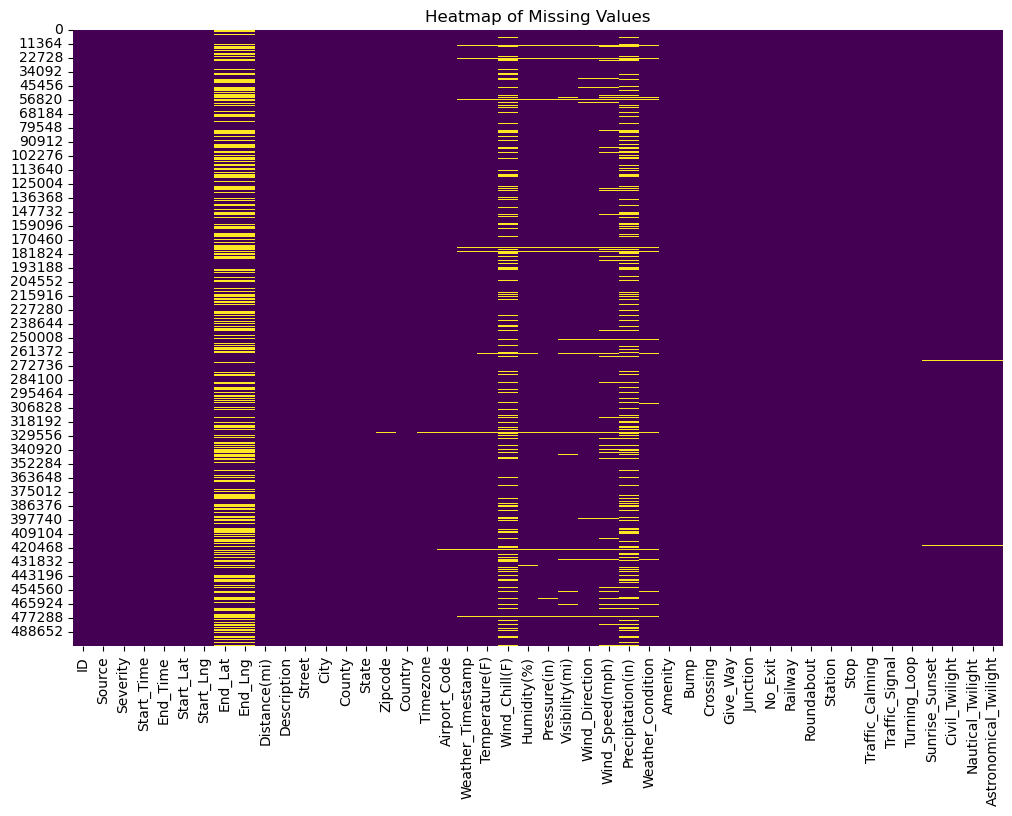

In [17]:
# Visualize Missing Values

plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [58]:
# Select Columns for Analysis

basic_columns = ['ID', 'Severity', 
                    'Start_Time', 'End_Time',
                    'Start_Lat', 'Start_Lng', 'Distance(mi)', 
                    'Street', 'City', 'State', 'Zipcode', 'Country', 'Timezone']

basic_df = data[basic_columns]
print(basic_df.info())
basic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            500000 non-null  object 
 1   Severity      500000 non-null  int64  
 2   Start_Time    500000 non-null  object 
 3   End_Time      500000 non-null  object 
 4   Start_Lat     500000 non-null  float64
 5   Start_Lng     500000 non-null  float64
 6   Distance(mi)  500000 non-null  float64
 7   Street        499309 non-null  object 
 8   City          499981 non-null  object 
 9   State         500000 non-null  object 
 10  Zipcode       499884 non-null  object 
 11  Country       500000 non-null  object 
 12  Timezone      499493 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 49.6+ MB
None


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,State,Zipcode,Country,Timezone
0,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,0.000,Highway 19,Zachary,LA,70791-4610,US,US/Central
1,A-4694324,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,0.056,Forest Ridge Dr,Sterling,VA,20164-2813,US,US/Eastern
2,A-5006183,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,0.022,Floradale Ave,Lompoc,CA,93436,US,US/Pacific
3,A-4237356,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,1.054,14th St NW,Austin,MN,55912,US,US/Central
4,A-6690583,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,0.046,River Blvd,Bakersfield,CA,93305-2649,US,US/Pacific


# convert column into correct type
## 1. Start_Time and End_Time into datetime 
Issue: the format is not intergrate, need to modify them

## 2. Severity into categorical type. 


In [59]:
start_time = basic_df['Start_Time'].str.replace(r'\.\d+$', '', regex=True)
start_time = pd.to_datetime(start_time)
basic_df['Start_Time'] = start_time

end_time = basic_df['End_Time'].str.replace(r'\.\d+$', '', regex=True)
end_time = pd.to_datetime(end_time)
basic_df['End_Time'] = end_time
print(basic_df.info())

/var/folders/vk/4z4k92g913l50bdgrqh6rhk80000gn/T/ipykernel_90162/3666792584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_df['Start_Time'] = start_time
/var/folders/vk/4z4k92g913l50bdgrqh6rhk80000gn/T/ipykernel_90162/3666792584.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_df['End_Time'] = end_time


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            500000 non-null  object        
 1   Severity      500000 non-null  int64         
 2   Start_Time    500000 non-null  datetime64[ns]
 3   End_Time      500000 non-null  datetime64[ns]
 4   Start_Lat     500000 non-null  float64       
 5   Start_Lng     500000 non-null  float64       
 6   Distance(mi)  500000 non-null  float64       
 7   Street        499309 non-null  object        
 8   City          499981 non-null  object        
 9   State         500000 non-null  object        
 10  Zipcode       499884 non-null  object        
 11  Country       500000 non-null  object        
 12  Timezone      499493 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 49.6+ MB
None


In [60]:
severity_level = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Critical'}
basic_df['Severity'] = basic_df['Severity'].map(severity_level)
print(basic_df['Severity'].value_counts())


Severity
Medium      398142
High         84520
Critical     13064
Low           4274
Name: count, dtype: int64


/var/folders/vk/4z4k92g913l50bdgrqh6rhk80000gn/T/ipykernel_90162/67298669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_df['Severity'] = basic_df['Severity'].map(severity_level)


/var/folders/vk/4z4k92g913l50bdgrqh6rhk80000gn/T/ipykernel_90162/2665371370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=basic_df, x='Severity', palette='viridis')


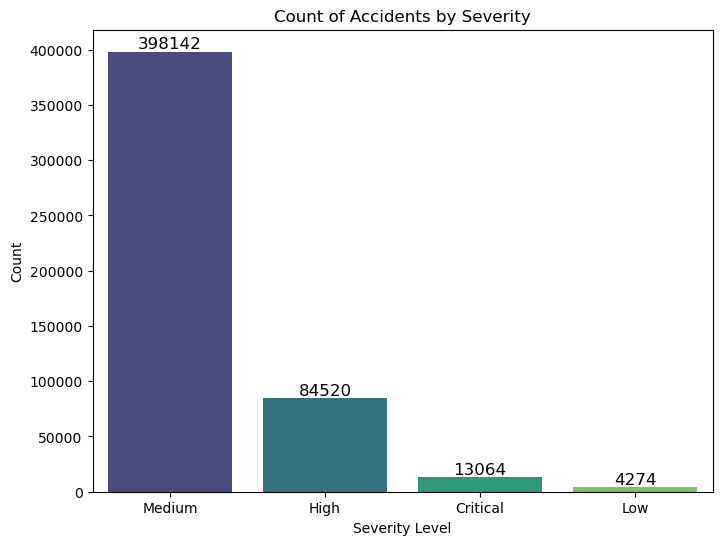

In [63]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size for better visibility
ax = sns.countplot(data=basic_df, x='Severity', palette='viridis')

# Add titles and labels for clarity
plt.title('Count of Accidents by Severity')
plt.xlabel('Severity Level')
plt.ylabel('Count')

# Adding count numbers on top of the bars
for p in ax.patches:
    height = p.get_height()  # Get the height (count) of each bar
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Position the text
            int(height),  # Value of the count
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment (above the bar)
            fontsize=12)  # Font size

# Display the plot
plt.show()

In [49]:
temp = basic_df['Start_Time'].str.replace(r'\.\d+$', '', regex=True)
temp = pd.to_datetime(temp)
temp

0        2019-06-12 10:10:56
1        2022-12-03 23:37:14
2        2022-08-20 13:13:00
3        2022-02-21 17:43:04
4        2020-12-04 01:46:00
                 ...        
499995   2021-12-15 07:30:00
499996   2021-12-19 16:25:00
499997   2022-04-13 19:28:29
499998   2020-05-15 17:20:56
499999   2022-04-02 23:23:13
Name: Start_Time, Length: 500000, dtype: datetime64[ns]

In [50]:
temp.isna().sum()

0